In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
print(ad.__version__)

0.7.8


In [ ]:
# results_file = '../data/sc_write/'

In [15]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.figdir = '../outs/Fig1/'
sc.settings.set_figure_params(dpi=80, dpi_save=300, format="eps", frameon=False)  # low dpi (dots per inch) yields small inline figures

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.21.5 scipy==1.8.0 pandas==1.4.1 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.9 pynndescent==0.5.6


In [5]:
adata = sc.read_h5ad("../data/cells_postprocessed.h5ad")
adata

/Users/Ray/miniconda3/envs/SCB_mac/lib/python3.10/site-packages/anndata/compat/__init__.py:180: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


AnnData object with n_obs × n_vars = 5939 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'barcode', 'library', 'sizeFactor', 'sum', 'detected', 'subsets_Mito_sum', 'subsets_Mito_detected', 'subsets_Mito_percent', 'subsets_Ribo_sum', 'subsets_Ribo_detected', 'subsets_Ribo_percent', 'total', 'low_lib_size', 'low_n_features', 'high_subsets_Mito_percent', 'high_subsets_Ribo_percent', 'discard', 'codename', 'treat', 'dose', 'duration', 'mouse', 'serum_term', 'description', 'treat_dose_duration', 'stim', 'cell_type_cellassign', 'integrated_snn_res.0.8', 'seurat_clusters', 'RNA_snn_res.0.8', 'cell_type_refined', 'cell_type_brief'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'integrated_features'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_umap', 'X_umap.int'
    varm: 'PCs'
    layers: 'integrated'
    obsp: 'distances'

In [6]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw=adata

normalizing counts per cell
    finished (0:00:00)


In [9]:
marker_genes = ["Gh","Ghrhr",       ## Som
                "Prl","Angpt1",     ## Lac
                "Pomc","Tbx19",     ## Cort
                "Pax7",             ## Mel
                "Cga","Fshb","Lhb", ## Gonad
                "Tshb","Trhr",      ## Thyro
                "Pbk","Mki67",      ## Pou1f1
                "Sox2","Cyp2f2",    ## Stem
                "Ctss",             ## WBCs
                "Hbb-bt",           ## RBCs
                "Pecam1","Emcn",    ## Endo
                "Col1a1","Ogn",     ## Peri
                "Col25a1","Scn7a"   ## Pitui
               ]
order = ["Som","Lac","Cort","Mel","Gonad","Thyro","Pou1f1","Stem","WBCs","RBCs","Endo","Peri","Pitui",
         "Ambig"]
vln_palette = ["#F8766D","#F8766D",  ## Som
               "#E38900","#E38900",  ## Lac
               "#C49A00","#C49A00",  ## Cort
               "#99A800",            ## Mel
               "#53B400","#53B400","#53B400",  ## Gonad
               "#00BC56","#00BC56",  ## Thyro
               "#00C094","#00C094",  ## Pou1f1
               "#00BFC4","#00BFC4",  ## Stem
               "#00B6EB",  ## WBCs
               "#06A4FF",  ## RBCs
               "#A58AFF","#A58AFF",  ## Endo
               "#DF70F8","#DF70F8",  ## Peri
               "#FB61D7","#FB61D7"   ## Pitui
              ]
adata.obs['cell_type_brief'].cat.reorder_categories(order, inplace=True)

/var/folders/v3/96c771fj1x3fpbxxrhy446k80000gn/T/ipykernel_28619/4068506119.py:31: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata.obs['cell_type_brief'].cat.reorder_categories(order, inplace=True)


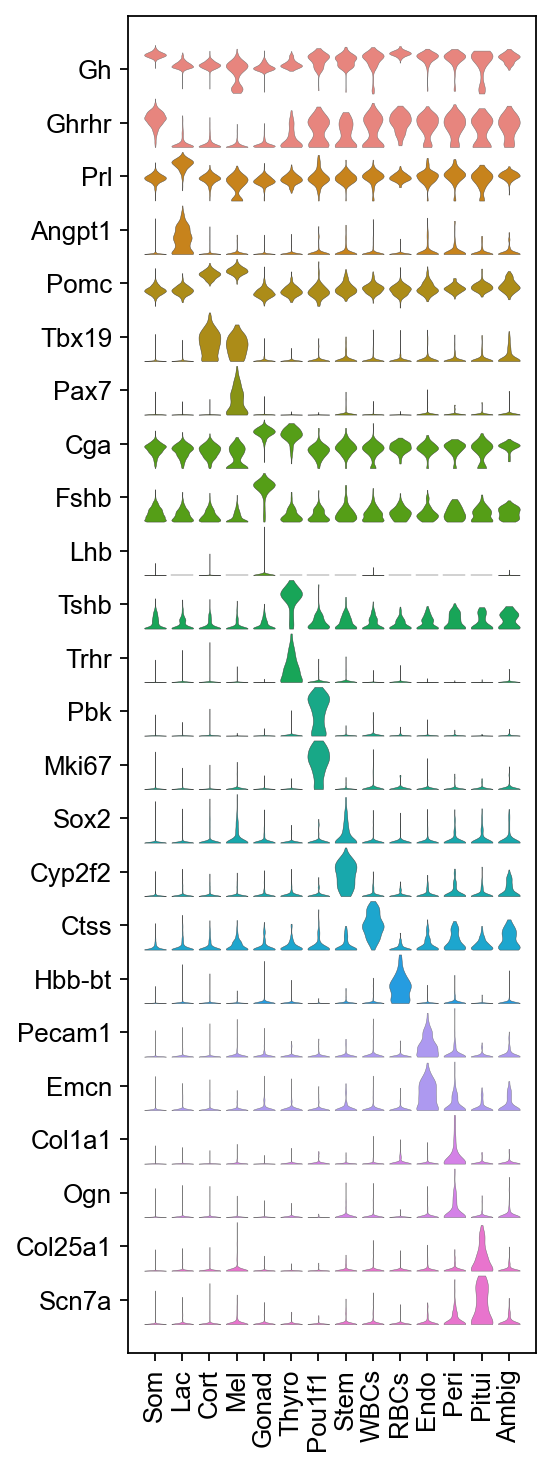

In [25]:
sc.pl.stacked_violin(
    adata, 
    var_names=marker_genes, 
    groupby="cell_type_brief", 
    rotation=90, 
    yticklabels=False,
    swap_axes=True, 
    dendrogram=False, 
    order=order, 
    row_palette=vln_palette, 
    figsize=(5,11), 
    save="_vertical"
)

In [14]:
# ax = sc.pl.stacked_violin(adata, 
#                           var_names=marker_genes, 
#                           groupby="cell_type_brief",
#                           dendrogram=False, 
#                           row_palette=vln_palette, 
#                           figsize=(18,6), 
#                           save="_horizontal.png")